# Neural Network Result Analysis

## Preparation

Useful libraries are loaded:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import dashboard_building as db

%matplotlib inline

The images are 512 * 512 pixels. This experience set has been done with 25-images batches. The used neural network is composed of 6 convolutional layers (each of which being followed by a pooling operation) and 2 fully-connected layers. Resulting files are uploaded:

In [2]:
INSTANCE_NAME = "cm_base_6_2_512"

In [3]:
res = pd.read_csv("../data/results/" + INSTANCE_NAME + "/" + INSTANCE_NAME + ".csv")
dr = pd.read_csv("../data/results/" + INSTANCE_NAME + "/" + INSTANCE_NAME + "_step7199.csv")

In [4]:
dr.head(10).T

,0,1,2,3,4,5,6,7,8,9
label,global,label_00,label_01,label_02,label_03,label_04,label_05,label_06,label_07,label_08
acc,0.866667,1,1,0.88,0.24,1,1,0.6,1,1
fm,0.674556,NaN,NaN,0.93617,NaN,NaN,NaN,NaN,NaN,NaN
fn,173,0,0,0,19,0,0,10,0,0
fnr,0.431421,NaN,NaN,0,1,NaN,NaN,1,NaN,NaN
fp,47,0,0,3,0,0,0,0,0,0
fpr,0.0376301,0,0,1,0,0,0,0,0,0
pnv,0.874182,1,1,NaN,0.24,1,1,0.6,1,1
ppv,0.829091,NaN,NaN,0.88,NaN,NaN,NaN,NaN,NaN,NaN
tn,1202,25,25,0,6,25,25,15,25,25


In [5]:
res

,epoch,loss,bpmll_loss,hamming_loss,tn,fp,fn,tp,acc,tpr,...,fn_65,tp_65,acc_65,tpr_65,tnr_65,fpr_65,fnr_65,ppv_65,fpv_65,fm_65
0,0.0,6.002018e+11,33.301010,0.587879,487.0,823.0,147.0,193.0,0.412121,0.567647,...,9.0,13.0,0.52,0.590909,0.0,1.0,0.409091,0.812500,0.000000,0.684211
1,4.0,8.044182e+09,15.797366,0.138182,1232.0,124.0,104.0,190.0,0.861818,0.646259,...,0.0,17.0,0.68,1.000000,0.0,1.0,0.000000,0.680000,NaN,0.809524
2,9.0,1.939407e+09,18.098801,0.180000,1141.0,94.0,203.0,212.0,0.820000,0.510843,...,2.0,18.0,0.76,0.900000,0.2,0.8,0.100000,0.818182,0.333333,0.857143
3,14.0,6.288804e+08,15.008344,0.116970,1259.0,93.0,100.0,198.0,0.883030,0.664430,...,1.0,17.0,0.68,0.944444,0.0,1.0,0.055556,0.708333,0.000000,0.809524
4,19.0,6.969969e+08,18.173050,0.161212,1188.0,76.0,190.0,196.0,0.838788,0.507772,...,0.0,23.0,0.96,1.000000,0.5,0.5,0.000000,0.958333,1.000000,0.978723
5,24.0,4.997891e+08,18.849241,0.178788,1179.0,62.0,233.0,176.0,0.821212,0.430318,...,2.0,21.0,0.84,0.913043,0.0,1.0,0.086957,0.913043,0.000000,0.913043
6,29.0,1.071761e+08,18.163818,0.159394,1199.0,52.0,211.0,188.0,0.840606,0.471178,...,0.0,23.0,0.92,1.000000,0.0,1.0,0.000000,0.920000,NaN,0.958333
7,34.0,1.122015e+08,18.223743,0.170303,1166.0,46.0,235.0,203.0,0.829697,0.463470,...,0.0,24.0,0.96,1.000000,0.0,1.0,0.000000,0.960000,NaN,0.979592
8,39.0,3.284466e+06,18.331057,0.143636,1276.0,143.0,94.0,137.0,0.856364,0.593074,...,0.0,12.0,0.48,1.000000,0.0,1.0,0.000000,0.480000,NaN,0.648649
9,44.0,1.962590e+06,22.527100,0.241212,1082.0,246.0,152.0,170.0,0.758788,0.527950,...,0.0,16.0,0.64,1.000000,0.0,1.0,0.000000,0.640000,NaN,0.780488


## Convolution matrix evolution

The convolution matrix is really stable iterations after iterations. We have a large majority of true negatives, *i.e.* away objects that are marked as away (around 1200 over 1650). The true positives and the false labels are quite similar, even if there are a little bit more true positives.

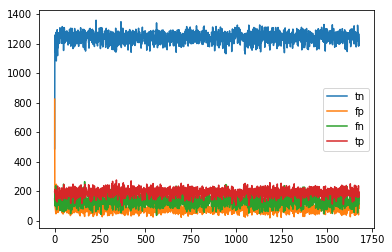

In [6]:
plt.plot(res.loc[-10: ,["tn", "fp", "fn", "tp"]])
plt.legend(["tn", "fp", "fn", "tp"])

In [7]:
res[["tn", "fp", "fn", "tp"]].tail(10)

,tn,fp,fn,tp
1667,1239.0,60.0,136.0,215.0
1668,1324.0,118.0,51.0,157.0
1669,1304.0,117.0,71.0,158.0
1670,1250.0,68.0,125.0,207.0
1671,1271.0,90.0,104.0,185.0
1672,1205.0,69.0,170.0,206.0
1673,1183.0,39.0,192.0,236.0
1674,1266.0,117.0,109.0,158.0
1675,1238.0,108.0,137.0,167.0
1676,1187.0,83.0,188.0,192.0


## What is the model response?

By considering the last training iteration, we can investigate on the model ability to detect every Mapillary features.

In [8]:
dr["pos_pred_part"].loc[1:].value_counts()

0.0      55
100.0    11
Name: pos_pred_part, dtype: int64

The model seems uncapable to shade its response in this last batch : each label is supposed to be either on all images or on none of them.

We can go deeper into this observation, by considering the model return at varying training steps.

In [9]:
training_steps = np.linspace(4, 7199, (7199-4)/500).tolist()
training_steps.insert(0, 0)
model_result_filenames = ["../data/results/" + INSTANCE_NAME + "/" + INSTANCE_NAME + "_step" + str(int(i)) + ".csv" for i in training_steps]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [10]:
model_result_filenames[:10]

['../data/results/cm_base_6_2_512/cm_base_6_2_512_step0.csv',
 '../data/results/cm_base_6_2_512/cm_base_6_2_512_step4.csv',
 '../data/results/cm_base_6_2_512/cm_base_6_2_512_step557.csv',
 '../data/results/cm_base_6_2_512/cm_base_6_2_512_step1110.csv',
 '../data/results/cm_base_6_2_512/cm_base_6_2_512_step1664.csv',
 '../data/results/cm_base_6_2_512/cm_base_6_2_512_step2217.csv',
 '../data/results/cm_base_6_2_512/cm_base_6_2_512_step2771.csv',
 '../data/results/cm_base_6_2_512/cm_base_6_2_512_step3324.csv',
 '../data/results/cm_base_6_2_512/cm_base_6_2_512_step3878.csv',
 '../data/results/cm_base_6_2_512/cm_base_6_2_512_step4431.csv']

The proportion of true predictions per batch is either equal to 0% or 100%. We can verify that by investigating the situation for every 66 Mapillary labels. The following function gives a list of histograms of model responses, for different training steps.

2017-12-18 13:56:13,272 [INFO] Step 0.0
2017-12-18 13:56:13,458 [INFO] Step 99.0
2017-12-18 13:56:13,551 [INFO] Step 199.0
2017-12-18 13:56:13,646 [INFO] Step 299.0
2017-12-18 13:56:13,739 [INFO] Step 399.0
2017-12-18 13:56:13,829 [INFO] Step 499.0
2017-12-18 13:56:13,920 [INFO] Step 599.0
2017-12-18 13:56:14,015 [INFO] Step 699.0
2017-12-18 13:56:14,115 [INFO] Step 799.0
2017-12-18 13:56:14,219 [INFO] Step 899.0
2017-12-18 13:56:14,312 [INFO] Step 999.0
2017-12-18 13:56:14,408 [INFO] Step 1099.0
2017-12-18 13:56:14,503 [INFO] Step 1199.0
2017-12-18 13:56:14,598 [INFO] Step 1299.0
2017-12-18 13:56:14,687 [INFO] Step 1399.0
2017-12-18 13:56:14,780 [INFO] Step 1499.0
2017-12-18 13:56:14,878 [INFO] Step 1599.0
2017-12-18 13:56:14,983 [INFO] Step 1699.0
2017-12-18 13:56:15,085 [INFO] Step 1799.0
2017-12-18 13:56:15,184 [INFO] Step 1899.0
2017-12-18 13:56:15,290 [INFO] Step 1999.0
2017-12-18 13:56:15,396 [INFO] Step 2099.0
2017-12-18 13:56:15,497 [INFO] Step 2199.0
2017-12-18 13:56:15,608 [

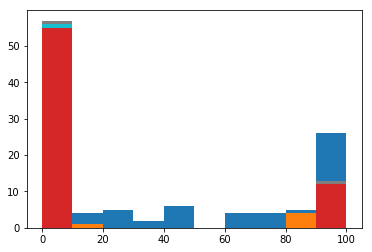

In [11]:
mr = db.analyze_model_results(res, 20)

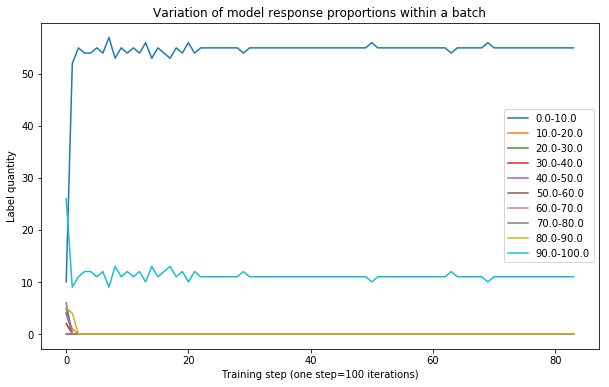

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(mr)
plt.title("Variation of model response proportions within a batch")
plt.legend([str(i)+"-"+str(i+10) for i in np.linspace(0, 100, 11)])
plt.xlabel("Training step (one step=100 iterations)")
plt.ylabel("Label quantity")

On the previous plot, we see that most of objects are always marked as away by the model (`0.0-10.0` category, even if it is generally 0%...), and the remaining objects are always marked as on the picture (`90.0-100.0` category, 100% in reality). After a few training iterations, all objects are in one of these two categories, no shaded response arises.

## Confirmation with a few metrics

The previous results detail the model response with the help of the confusion matrix. What are the values of classic metrics such accuracy, precision, recall?

First of all, we must let aside the labels that are always out of dataset images (and recognized by the model). A majority of labels are in such a case. By definition, accuracy equals 1 for them; whereas precision and recall are not defined.

In [17]:
dr.query("tn==25").shape

(39, 19)

In [33]:
dr2 = dr.query("tn<25")
dr2.index = range(dr2.shape[0])

Two other cases arise with such results: when the model give `true` (respectively `false`) labels for each image of the batch.

In the first situation, the recall is equal to 1 (all real `true` have been identified). The accuracy and the precision have the same value, which depends on the amount of real `true` labels (they are higher when this quantity is higher):

In [40]:
dr2.query("pos_pred==25")

,label,acc,fm,fn,fnr,fp,fpr,pnv,ppv,tn,tnr,tp,tpr,positive,negative,pos_pred,neg_pred,positive_part,pos_pred_part
0,label_02,0.88,0.936170,0.0,0.0,3.0,1.0,NaN,0.88,0.0,0.0,22.0,1.0,22.0,3.0,25.0,0.0,88.0,100.0
4,label_13,0.88,0.936170,0.0,0.0,3.0,1.0,NaN,0.88,0.0,0.0,22.0,1.0,22.0,3.0,25.0,0.0,88.0,100.0
6,label_17,0.88,0.936170,0.0,0.0,3.0,1.0,NaN,0.88,0.0,0.0,22.0,1.0,22.0,3.0,25.0,0.0,88.0,100.0
10,label_24,0.56,0.717949,0.0,0.0,11.0,1.0,NaN,0.56,0.0,0.0,14.0,1.0,14.0,11.0,25.0,0.0,56.0,100.0
11,label_27,0.88,0.936170,0.0,0.0,3.0,1.0,NaN,0.88,0.0,0.0,22.0,1.0,22.0,3.0,25.0,0.0,88.0,100.0
13,label_30,0.88,0.936170,0.0,0.0,3.0,1.0,NaN,0.88,0.0,0.0,22.0,1.0,22.0,3.0,25.0,0.0,88.0,100.0
16,label_44,0.76,0.863636,0.0,0.0,6.0,1.0,NaN,0.76,0.0,0.0,19.0,1.0,19.0,6.0,25.0,0.0,76.0,100.0
17,label_45,1.00,1.000000,0.0,0.0,0.0,NaN,NaN,1.00,0.0,NaN,25.0,1.0,25.0,0.0,25.0,0.0,100.0,100.0
20,label_50,0.84,0.913043,0.0,0.0,4.0,1.0,NaN,0.84,0.0,0.0,21.0,1.0,21.0,4.0,25.0,0.0,84.0,100.0
23,label_55,0.68,0.809524,0.0,0.0,8.0,1.0,NaN,0.68,0.0,0.0,17.0,1.0,17.0,8.0,25.0,0.0,68.0,100.0


In the second case, the recall is equal to 0 (no `true` label has been recognized), and the precision is not defined. The accuracy depends on the amount of real `true` labels (it is larger when there are more real `false` labels):

In [42]:
dr3 = dr2.query("pos_pred < 25") ; dr3

,label,acc,fm,fn,fnr,fp,fpr,pnv,ppv,tn,tnr,tp,tpr,positive,negative,pos_pred,neg_pred,positive_part,pos_pred_part
1,label_03,0.24,NaN,19.0,1.0,0.0,0.0,0.24,NaN,6.0,1.0,0.0,0.0,19.0,6.0,0.0,25.0,76.0,0.0
2,label_06,0.60,NaN,10.0,1.0,0.0,0.0,0.60,NaN,15.0,1.0,0.0,0.0,10.0,15.0,0.0,25.0,40.0,0.0
3,label_09,0.44,NaN,14.0,1.0,0.0,0.0,0.44,NaN,11.0,1.0,0.0,0.0,14.0,11.0,0.0,25.0,56.0,0.0
5,label_15,0.12,NaN,22.0,1.0,0.0,0.0,0.12,NaN,3.0,1.0,0.0,0.0,22.0,3.0,0.0,25.0,88.0,0.0
7,label_19,0.40,NaN,15.0,1.0,0.0,0.0,0.40,NaN,10.0,1.0,0.0,0.0,15.0,10.0,0.0,25.0,60.0,0.0
8,label_20,0.84,NaN,4.0,1.0,0.0,0.0,0.84,NaN,21.0,1.0,0.0,0.0,4.0,21.0,0.0,25.0,16.0,0.0
9,label_23,0.52,NaN,12.0,1.0,0.0,0.0,0.52,NaN,13.0,1.0,0.0,0.0,12.0,13.0,0.0,25.0,48.0,0.0
12,label_29,0.44,NaN,14.0,1.0,0.0,0.0,0.44,NaN,11.0,1.0,0.0,0.0,14.0,11.0,0.0,25.0,56.0,0.0
14,label_35,0.44,NaN,14.0,1.0,0.0,0.0,0.44,NaN,11.0,1.0,0.0,0.0,14.0,11.0,0.0,25.0,56.0,0.0
15,label_39,0.88,NaN,3.0,1.0,0.0,0.0,0.88,NaN,22.0,1.0,0.0,0.0,3.0,22.0,0.0,25.0,12.0,0.0
